# Moving Average Smoothing

Moving average smoothing is a naive and effective technique in time series forecasting. It can be used for data preparation, feature engineering, and even directly for making predictions. 

Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting. Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.

A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value. The moving part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calculate the average values in the new series. There are two main types of moving average that are used: Centered and Trailing Moving Average.

## Centered Moving Average

The value at time (t) is calculated as the average of raw observations at, before, and after time (t). For example, a center moving average with a window of 3 would be calculated as:

center_ma(t) = mean(obs(t-1), obs(t), obs(t + 1))

This method requires knowledge of future values, and as such is used on time series analysis to better understand the dataset. A center moving average can be used as a general method to remove trend and seasonal components from a time series, a method that we often cannot use when forecasting.


## Trailing Moving Average

The value at time (t) is calculated as the average of the raw observations at and before the time (t). For example, a trailing moving average with a window of 3 would be calculated as:

trail_ma(t) = mean(obs(t-2), obs(t-1), obs(t))

Trailing moving average only uses historical observations and is used on time series forecasting.

## Data Expectations

Calculating a moving average of a time series makes some assumptions about your data. It is assumed that both trend and seasonal components have been removed from your time series. This means that your time series is stationary, or does not show obvious trends (long-term increasing or decreasing movement) or seasonality (consistent periodic structure).

There are many methods to remove trends and seasonality from a time series dataset when forecasting. Two good methods for each are to use the differencing method and to model the behavior and explicitly subtract it from the series.

Moving average values can be used in a number of ways when using machine learning algorithms on time series problems. In this tutorial, we will look at how we can calculate trailing moving average values for use as data preparation, feature engineering, and for directly making predictions. Before we dive into these examples, let’s look at the Daily Female Births dataset that we will use in each example.

### Moving Average as Data Preparation

Moving average can be used as a data preparation technique to create a smoothed version of the original dataset. Smoothing is useful as a data preparation technique as it can reduce the random variation in the observations and better expose the structure of the underlying causal processes.

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Daily total female births in California, 1959, dtype: float64


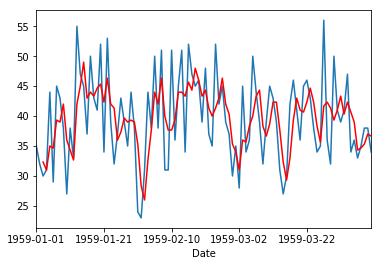

In [4]:
#Moving average smoothin as data preparation
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('female-births.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

#tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

#plot original and transformed dataset
#series.plot()
#rolling_mean.plot(color='red')
#pyplot.show()
#Zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color='red')
pyplot.show()

### Moving Average as Feature Engineering
The moving average can be used as a source of new information when modeling a time series forecast as a supervised learning problem. In this case, the moving average is calculated and added as a new input feature used to predict the next time step. First, a copy of the series must be shifted forward by one time step. This will represent the input to our prediction problem, or a lag=1 version of the series. 

Next, a second copy of the series needs to be shifted forward by one, minus the window size. This is to ensure that the moving average summarizes the last few values and does not include the value to be predicted in the average, which would be an invalid framing of the problem as the input would contain knowledge of the future being predicted.

For example, with a window size of 3, we must shift the series forward by 2 time steps. This is because we want to include the previous two observations as well as the current observation in the moving average in order to predict the next value. We can then calculate the moving average from this shifted series.

Below is an example of including the moving average of the previous 3 values as a new feature, as well as the original t input feature for the Daily Female Births dataset.

In [9]:
# moving average smoothing as feature engineering
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

series = read_csv('female-births.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't', 't+1']
print(datafram.head(10))


           0     0   0
0        NaN   NaN  35
1        NaN  35.0  32
2        NaN  32.0  30
3        NaN  30.0  31
4  32.333333  31.0  44
5  31.000000  44.0  29
6  35.000000  29.0  45
7  34.666667  45.0  43
8  39.333333  43.0  38
9  39.000000  38.0  27


### Moving Average as Prediction

The moving average value can also be used directly to make predictions. It is a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for. The moving average model for predictions can easily be used in a walk-forward manner. As new observations are made available (e.g. daily), the model can be updated and a prediction made for the next day. We can implement this manually in Python. Below is an example of the moving average model used in a walk-forward manner.

Test RMSE: 100.449


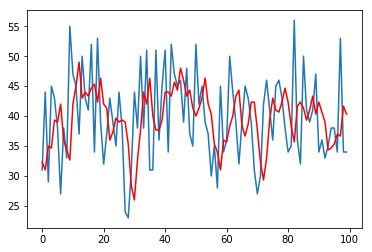

In [14]:
# moving average smoothing as a forecast model
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

series = read_csv('female-births.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

#preparation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

#walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' %(yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

#plot
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#zoom
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()